---

title: **Artificial Reef** Data Preprocessing

author: Tiago Ribeiro

date: 15/03/2023

---

In [36]:
import os
DIR = os.getcwd()
ANN_FILE = os.path.join(DIR, 'data_800_600\\result.json')
IMGS_DIR = os.path.join(DIR, 'data_800_600\\images')
MSKS_DIR = os.path.join(DIR, 'data_800_600\\masks')
os.makedirs(MSKS_DIR, exist_ok=True)

#### Loading annotations

In [4]:
from pycocotools.coco import COCO
dset = COCO(ANN_FILE)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


#### Dataset Visualization

In [6]:
catIDs = dset.getCatIds()
cats = dset.loadCats(catIDs)
print(f"Category: {cats}")

Category: [{'id': 0, 'name': 'reef'}]


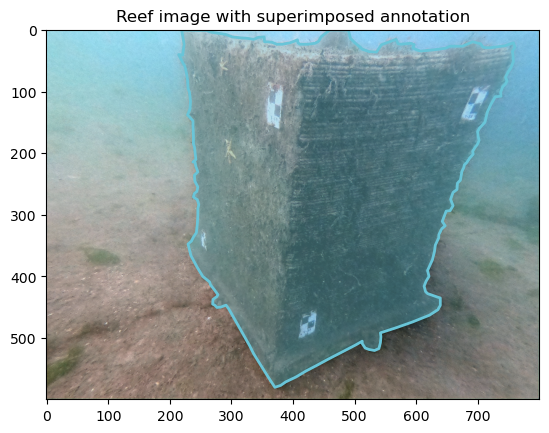

In [11]:
# load and display a random image with the annotation
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt
imgIds = dset.getImgIds(catIds=[0])
img_info = dset.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img_dir_reef = os.path.join(IMGS_DIR)
img = io.imread(os.path.join(img_dir_reef, os.path.basename(img_info['file_name'])))
plt.title("Reef image with superimposed annotation")
plt.imshow(img);
annIds = dset.getAnnIds(imgIds=img_info['id'], catIds=0, iscrowd=None)
anns = dset.loadAnns(annIds)
dset.showAnns(anns, draw_bbox=False)

#### Data anottation conversion: JSON polygons to PNG masks

In [39]:
# generates segmentation mask for reef category
from pathlib import Path
from PIL import Image
from glob import glob

for i in range(len(glob(IMGS_DIR +'\\0' +"/*.PNG"))):
    img_info = dset.loadImgs(imgIds[i])[0]
    annIds = dset.getAnnIds(imgIds=img_info['id'], catIds=0, iscrowd=None)
    anns = dset.loadAnns(annIds)

    mask = np.zeros((img_info['height'],img_info['width']))
    for i in range(len(anns)):
        mask = np.maximum(dset.annToMask(anns[i]), mask)

    basename = Path(os.path.basename(img_info['file_name'])).stem           
    mask_reef = Image.fromarray(mask.astype(np.uint8)*255)
    
    if mask_reef.size != (800, 600):
        mask_reef = mask_reef.resize((800, 600))
    mask_reef.save(os.path.join(MSKS_DIR, '0',basename +'.png'))

#### Image and Mask Visualation (*Sanity check*)

Text(0.5, 1.0, 'Mask')

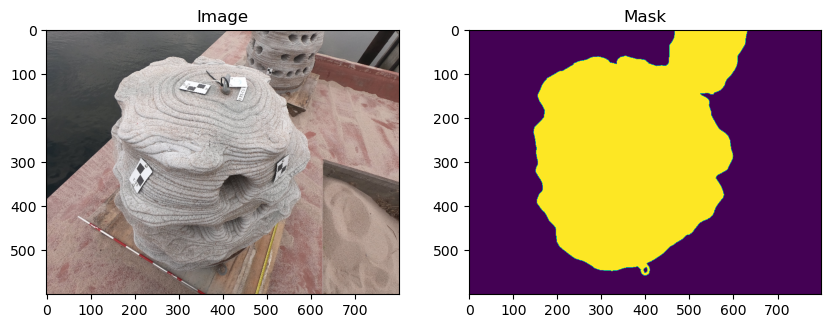

In [48]:
msks_paths = sorted(glob(MSKS_DIR + '\\0\\*.png'))
img_paths = sorted(glob(IMGS_DIR + '\\0\\*.PNG'))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
img = io.imread(img_paths[10])
ax1.imshow(img)
ax1.set_title('Image')
msk = io.imread(msks_paths[10])
ax2.imshow(msk)
ax2.set_title('Mask')